##INTRIDUCTION


We all love to read a good book even in this crazy busy world. But what makes book "good" and makes people buy books in this material and cunsumer dominating world?

WHAT IF I would to write the book?

In this EDA I would like to explore the idea of if I would write a book, what data can tell me what my book should look like.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import csv

In [2]:
books_data = pd.read_csv("./data/Books_Data_Clean.csv")
books_good_reads = pd.read_csv("./data/GoodReads_100k_books.csv")

#Dataset review

Ill start with reviewing two datasets that i would like to use in my EDA.

From this dataset i get basic values for initial analysis, like language, genre, book ratings and gross sales, units sold

In [3]:
books_data.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


From seond set i can get additional information, like pages amount and bookformat.

In [4]:
books_good_reads.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


For the first dataset books_data I would like to convert the year in more readable format. And convert language_code in more uniformed format. 

In [5]:
books_data['Publishing Year'].fillna(0).astype(int)

0       1975
1       1987
2       2015
3       2008
4       2011
        ... 
1065    2014
1066    1989
1067    1930
1068    2011
1069    1999
Name: Publishing Year, Length: 1070, dtype: int64

In [6]:
books_data['language_code'].value_counts()

language_code
eng      737
en-US    234
en-GB     30
en-CA      7
fre        4
spa        2
ara        2
nl         1
Name: count, dtype: int64

From this information I can see that most of the books are writen in English.

In [8]:
books_data['language_code'].replace({'en-US': 'eng', 'en-GB': 'eng', 'en-CA':'eng'},inplace=True)

In [9]:
# Check NaN values in each column.
for column in books_data.columns:
    print(column, books_data[column].isnull().sum())

index 0
Publishing Year 1
Book Name 23
Author 0
language_code 53
Author_Rating 0
Book_average_rating 0
Book_ratings_count 0
genre 0
gross sales 0
publisher revenue 0
sale price 0
sales rank 0
Publisher  0
units sold 0


In [10]:
num_rows = len(books_data)
print(f"Number of rows: {num_rows}")

Number of rows: 1070


In [11]:
# Drop a row if ALL columns in a row are NaN
books_data.dropna(how="all")

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",eng,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,eng,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1066,1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1067,1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,1068,2011.0,Night Road,Kristin Hannah,eng,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106


In [12]:
books_data.drop_duplicates()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",eng,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,eng,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1066,1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1067,1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,1068,2011.0,Night Road,Kristin Hannah,eng,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106


In [13]:
books_data['genre'].value_counts()

genre
genre fiction    822
nonfiction       171
fiction           62
children          15
Name: count, dtype: int64

By checking value counts I can see that genre fiction is dominating over other genre in this dataset. Im converting "fiction" into "science" to make analysis more interesting.

In [15]:
books_data['genre'].replace({'fiction': 'science'},inplace=True)

In [16]:
books_data['genre'].replace({'genre fiction': 'fiction'},inplace=True)

Now then my data is cleaner I can start analysing

Text(0, 0.5, 'Count')

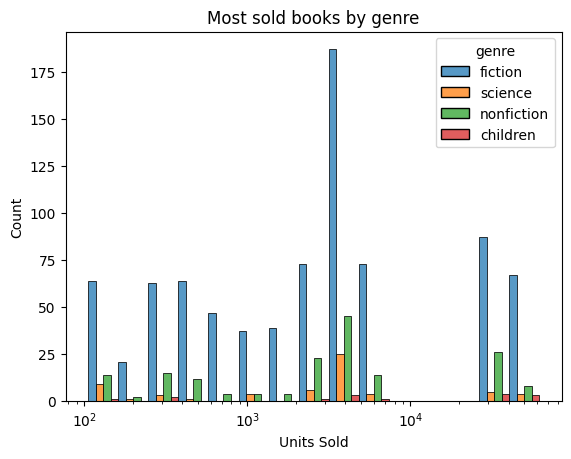

In [52]:
sns.histplot(data=books_data, x="units sold", hue="genre",multiple="dodge",  log_scale=True)
plt.title("Most sold books by genre")
plt.xlabel("Units Sold")
plt.ylabel("Count")

We can see that most books are writen in genre fiction. We also can see that the most sold books are in genre fiction.

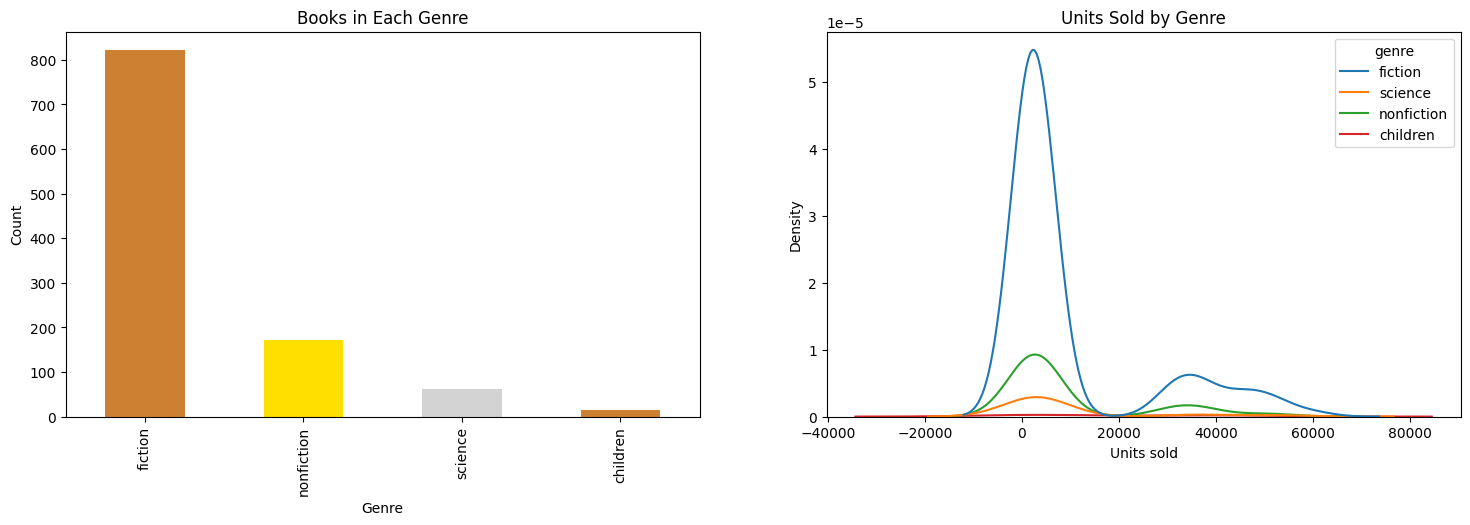

In [40]:
f, ax = plt.subplots(1, 2, figsize=(18, 5))
books_data['genre'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Books in Each Genre')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Genre')
sns.kdeplot(x='units sold', hue='genre', data=books_data, ax=ax[1])
ax[1].set_title('Units Sold by Genre')
ax[1].set_xlabel('Units sold')
plt.show()

From histogram below I can see that most sold books and books that generated most revenue are in genre fiction.

Text(0, 0.5, 'Revenue')

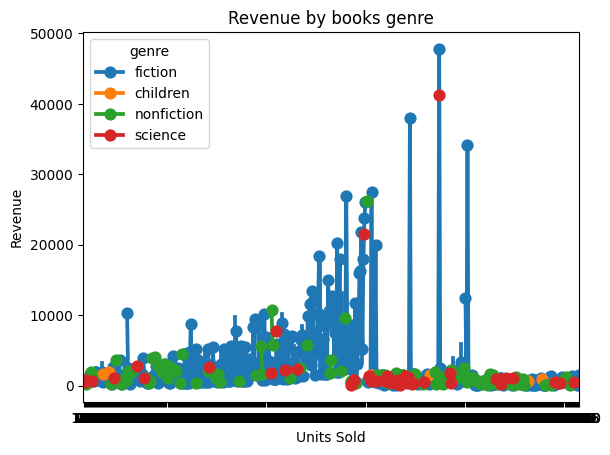

In [43]:
sns.pointplot(
    data=books_data, x="units sold", y="gross sales", hue="genre", dodge=True
 
)
plt.title("Revenue by books genre")
plt.xlabel("Units Sold")
plt.ylabel("Revenue")

Now I also want to know what books are most expensive. I can see that most expensive books are in English in genre fiction. From this absorvation I also can see that majority of most expensive books are writen by male authors. 

In [19]:
books_data.nlargest(10, 'sale price')
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
295,295,1908.0,The Wind in the Willows,"Kenneth Grahame, Gillian Avery",eng,Intermediate,3.98,124612,fiction,10327.30,6196.380,33.86,317,Penguin Group (USA) LLC,305
365,365,2003.0,We Need to Talk About Kevin,Lionel Shriver,eng,Excellent,4.07,101343,fiction,5902.92,3541.752,25.89,393,HarperCollins Publishers,6156
216,216,1995.0,Sabriel,Garth Nix,eng,Intermediate,4.17,137047,fiction,8811.18,5286.708,19.98,235,Random House LLC,441
377,377,2006.0,The Tenth Circle,Jodi Picoult,eng,Novice,3.48,99170,fiction,3955.60,2373.360,17.98,409,"Amazon Digital Services, Inc.",5940
949,949,1983.0,Alanna: The First Adventure,Tamora Pierce,eng,Excellent,4.27,85699,fiction,1867.80,1120.680,16.98,1119,Penguin Group (USA) LLC,4280
991,991,2009.0,Brooklyn,Colm TÃ³ibÃ­n,eng,Intermediate,3.63,55459,fiction,1659.96,995.976,15.37,1168,"Amazon Digital Services, Inc.",108
158,158,2012.0,Beautiful Ruins,Jess Walter,eng,Intermediate,3.67,116053,fiction,9818.45,5891.070,14.99,169,Random House LLC,655
1049,1049,1879.0,Et dukkehjem,"Henrik Ibsen, Michael Meyer",eng,Intermediate,3.69,69450,fiction,1588.94,953.364,14.99,1243,Hachette Book Group,106
732,732,2011.0,Leviathan Wakes,James S.A. Corey,eng,Excellent,4.20,68416,nonfiction,1689.48,1013.688,14.44,840,HarperCollins Publishers,33048
707,707,2006.0,What Is the What: The Autobiography of Valenti...,Dave Eggers,eng,Excellent,4.16,59333,fiction,1680.32,1008.192,14.24,811,Penguin Group (USA) LLC,35424


From this diagram I can see that children books are actualy rated higher then genre fiction books. 

Text(0, 0.5, 'Average rating')

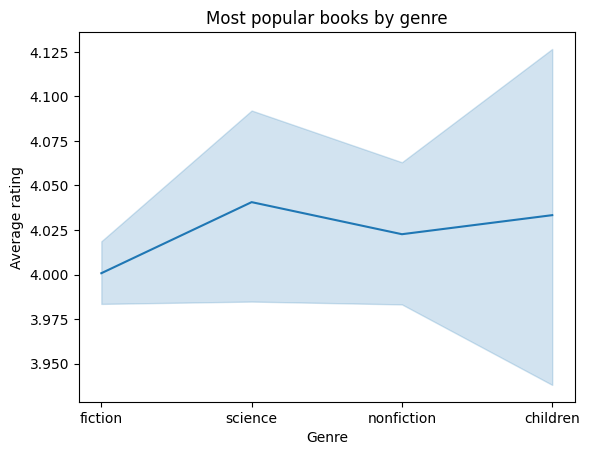

In [44]:
sns.lineplot(data=books_data, x='genre',y="Book_average_rating")
plt.title("Most popular books by genre")
plt.xlabel("Genre")
plt.ylabel("Average rating")

Now I want to connect two data sets so I can look at more options in exploring other interesting insights.

I think the best way to connect two datasets would be using books title. I can see that we now have 392 matching rows.

In [21]:
books_good_reads.rename(columns={'title': 'Title'}, inplace=True)
books_data.rename(columns={'Book Name': 'Title'}, inplace=True)

# After ensuring both have 'Title', merge the datasets
combined_books = pd.merge(books_good_reads, books_data, on='Title', how='inner')
#https://pandas.pydata.org/docs/user_guide/merging.html

In [22]:
combined_books.info

<bound method DataFrame.info of                                        author             bookformat  \
0                         Vanessa Diffenbaugh              Hardcover   
1                 Larry Niven,Jerry Pournelle  Mass Market Paperback   
2                                 Amor Towles              Hardcover   
3                                 Adam Slater              Hardcover   
4                                 David Poyer              Paperback   
..                                        ...                    ...   
388  Fabien Vehlmann,KerascoÃ«t,Helge Dascher              Hardcover   
389                              John Grisham              Hardcover   
390                          Frank E. Peretti              Paperback   
391                 Nikita Singh,Durjoy Datta              Paperback   
392            J. Lynn,Jennifer L. Armentrout                   Nook   

                                                  desc  \
0    The Victorian language of flowers was us

In [23]:
combined_books.head()

,author,bookformat,desc,genre_x,img,isbn,isbn13,link,pages,rating,...,Author_Rating,Book_average_rating,Book_ratings_count,genre_y,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,Vanessa Diffenbaugh,Hardcover,The Victorian language of flowers was used to ...,"Fiction,Romance,Contemporary,Book Club,Adult F...",https://i.gr-assets.com/images/S/compressed.ph...,034552554X,9.78E+12,https://goodreads.com/book/show/10032672-the-l...,323,4.08,...,Intermediate,4.07,140076,fiction,1964.16,1178.496,0.99,36,"Amazon Digital Services, Inc.",1984
1,"Larry Niven,Jerry Pournelle",Mass Market Paperback,"This is the 6th Pocket printing.,Cover Artist:...","Fantasy,Science Fiction,Fiction,Horror,Science...",https://i.gr-assets.com/images/S/compressed.ph...,671826581,9.78E+12,https://goodreads.com/book/show/100369.Inferno,237,3.83,...,Intermediate,3.99,87511,science,354.22,212.532,1.99,493,Hachette Book Group,4806
2,Amor Towles,Hardcover,This sophisticated and entertaining first nove...,"Fiction,Historical,Historical Fiction,Historic...",https://i.gr-assets.com/images/S/compressed.ph...,NaN,NaN,https://goodreads.com/book/show/10054335-rules...,335,4.04,...,Intermediate,3.99,75541,fiction,712.81,427.686,5.99,760,Penguin Group (USA) LLC,40824
3,Adam Slater,Hardcover,"Once every century, the barrier between the hu...","Horror,Fantasy,Paranormal,Young Adult,Fantasy,...",https://i.gr-assets.com/images/S/compressed.ph...,1606842617,9.78E+12,https://goodreads.com/book/show/10066376-hunted,208,3.97,...,Intermediate,3.93,138103,fiction,1871.25,1122.750,4.99,275,Random House LLC,375
4,David Poyer,Paperback,"The Navy's most sophisticated destroyer, the U...","War,Military Fiction,Fiction,Thriller,War",https://i.gr-assets.com/images/S/compressed.ph...,312954506,9.78E+12,https://goodreads.com/book/show/100729.The_Pas...,560,3.96,...,Intermediate,4.04,126993,fiction,3172.05,0.000,3.99,141,"Amazon Digital Services, Inc.",795


In [26]:
books_good_reads.rename(columns={'genre_x': 'genre'}, inplace=True)

Now I want to see what book format is more common. However, ive also want to know in which format books generate more revenue.

In [27]:
#clean the columns
combined_books.drop(['img','desc','isbn13','isbn','link'], axis=1)

,author,bookformat,genre_x,pages,rating,reviews,Title,totalratings,index,Publishing Year,...,Author_Rating,Book_average_rating,Book_ratings_count,genre_y,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,Vanessa Diffenbaugh,Hardcover,"Fiction,Romance,Contemporary,Book Club,Adult F...",323,4.08,20157,The Language of Flowers,199905,36,2011.0,...,Intermediate,4.07,140076,fiction,1964.16,1178.496,0.99,36,"Amazon Digital Services, Inc.",1984
1,"Larry Niven,Jerry Pournelle",Mass Market Paperback,"Fantasy,Science Fiction,Fiction,Horror,Science...",237,3.83,340,Inferno,5486,446,1320.0,...,Intermediate,3.99,87511,science,354.22,212.532,1.99,493,Hachette Book Group,4806
2,Amor Towles,Hardcover,"Fiction,Historical,Historical Fiction,Historic...",335,4.04,15917,Rules of Civility,160843,659,2011.0,...,Intermediate,3.99,75541,fiction,712.81,427.686,5.99,760,Penguin Group (USA) LLC,40824
3,Adam Slater,Hardcover,"Horror,Fantasy,Paranormal,Young Adult,Fantasy,...",208,3.97,129,Hunted,581,252,2009.0,...,Intermediate,3.93,138103,fiction,1871.25,1122.750,4.99,275,Random House LLC,375
4,David Poyer,Paperback,"War,Military Fiction,Fiction,Thriller,War",560,3.96,13,The Passage,419,134,2010.0,...,Intermediate,4.04,126993,fiction,3172.05,0.000,3.99,141,"Amazon Digital Services, Inc.",795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,"Fabien Vehlmann,KerascoÃ«t,Helge Dascher",Hardcover,"Sequential Art,Graphic Novels,Sequential Art,C...",94,3.87,1451,Beautiful Darkness,7952,616,2010.0,...,Intermediate,3.84,95447,nonfiction,260.69,156.414,1.99,700,HarperCollins Publishers,49248
389,John Grisham,Hardcover,"Fiction,Mystery,Thriller,Thriller,Legal Thrill...",447,4.03,10279,Sycamore Row,110447,561,2013.0,...,Intermediate,3.98,56315,fiction,1074.57,644.742,7.31,627,Penguin Group (USA) LLC,3969
390,Frank E. Peretti,Paperback,"Christian Fiction,Fiction,Christian,Fantasy,Th...",376,4.23,2117,This Present Darkness,95694,687,1986.0,...,Excellent,4.24,71815,fiction,352.82,0.000,2.99,791,"Amazon Digital Services, Inc.",36504
391,"Nikita Singh,Durjoy Datta",Paperback,"Romance,Fiction,Asian Literature,Indian Litera...",250,3.53,192,Someone Like You,3832,684,1998.0,...,Intermediate,3.94,84358,nonfiction,355.81,213.486,2.99,786,Simon and Schuster Digital Sales Inc,36936


In [28]:
combined_books['bookformat'].value_counts()

bookformat
Paperback                158
Hardcover                128
Mass Market Paperback     26
ebook                     26
Kindle Edition            24
Audio CD                   1
Boxed Set                  1
Mass Market                1
Unknown Binding            1
Trade Paperback            1
Nook                       1
Name: count, dtype: int64

In [55]:
combined_books['bookformat'].replace({'Audio CD': 'Other',
                                       'Boxed Set':'Other', 
                                       'Mass Market':'Other', 
                                       'Unknown Binding':'Other',
                                       'Trade paperback':'Other',
                                       'Nook':'Other'},
                                       inplace=True
                                       )

Text(0, 0.5, 'Count')

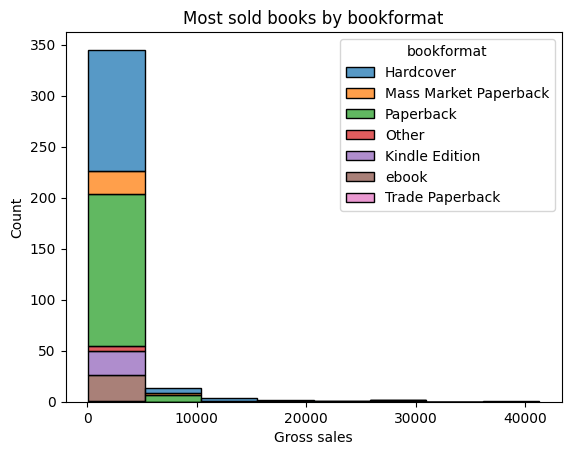

In [56]:
sns.histplot(data=combined_books, x="gross sales", hue="bookformat", multiple="stack",bins=8)
plt.title("Most sold books by bookformat")
plt.xlabel("Gross sales")
plt.ylabel("Count")


Now I want to see which genre have most common amount of pages. I can see that majority books over fiction, non fiction and childrens books are between 300 to a bit over 400 pages.

Text(0, 0.5, 'Pages')

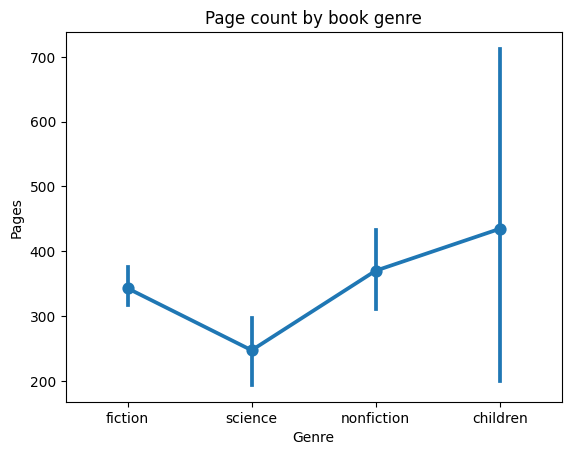

In [57]:
sns.pointplot(data=combined_books, x="genre_y", y="pages")
plt.title("Page count by book genre")
plt.xlabel("Genre")
plt.ylabel("Pages")

Text(0, 0.5, 'Sale price')

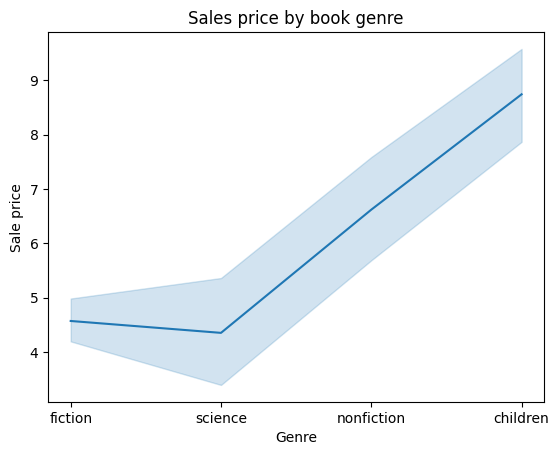

In [58]:
sns.lineplot(data=combined_books, x="genre_y", y="sale price")
plt.title("Sales price by book genre")
plt.xlabel("Genre")
plt.ylabel("Sale price")

From this diagram I can see that highest rated books are fiction and non fiction and they also get most amount of ratings.

Text(0, 0.5, 'Amount of ratings received')

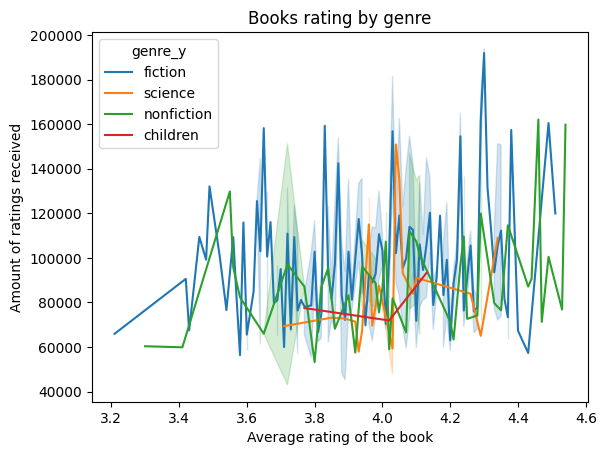

In [53]:
sns.lineplot(data=combined_books, x="Book_average_rating", y="Book_ratings_count", hue="genre_y")
plt.title("Books rating by genre")
plt.xlabel("Average rating of the book")
plt.ylabel("Amount of ratings received")

From a heatmap below I can see that the higher the book rating the higher the gross sale. 

The highest correlation is between Book_average_rating and Sales price i.e 0.065. 

In [62]:
combined_books.rename(columns={'gross sales': 'Gross_sales','sale price':'Sale_price' }, inplace=True)

In [63]:
subset = combined_books[["Book_average_rating", "Book_ratings_count", "Sale_price", "Gross_sales"]]

Text(0.5, 1.0, 'Book rating vs sales')

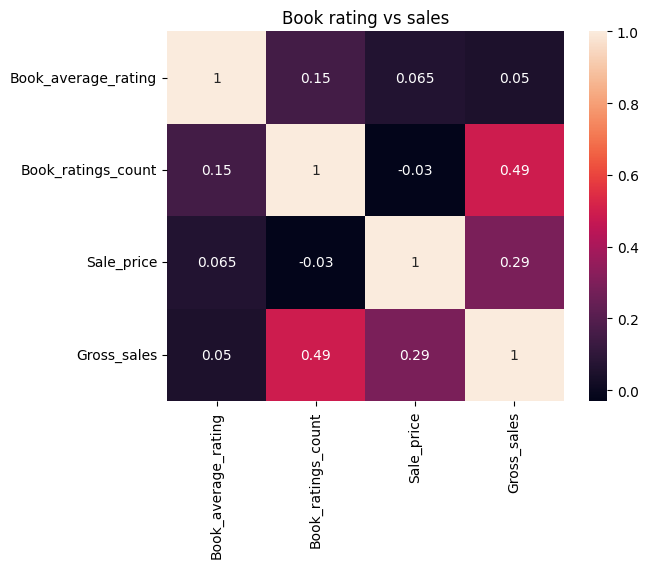

In [64]:
sns.heatmap(subset.corr(), annot=True)
plt.title("Book rating vs sales")


##Conclusion

If I would write a book, it should be in genre fiction, in english language. It should be between 300-420 pages long and have papercover. Also, i should consider writing it under man name. Sale price should be no higher then 5 units (unit referencing to currency).

However, if i would be looking for fame and wanted to seel my book as very expencive, it would be good to consider to write a children book, as they getting most highest ratings and seems to be most expensive. As children don't have money to buy this books, looks like parents would rather buy chipper book for themselves and more expensive for they children. 

Would be interesting to look for sub category of genere fiction if we would have this specific data. Also, would be more inetersting to explore if this data would have male/female authot division and publishing month. It would give more room for expleration. 
